Visualizing dyad

In [1]:
import skimage
import matplotlib.pyplot as plt
import numpy as np

# Loading an image
x = skimage.data.brick()

print("Shape of the image: ", x.shape, ".", sep='')

Shape of the image: (512, 512).


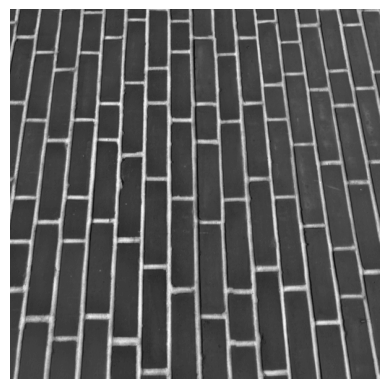

In [2]:
plt.imshow(x, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
U, s, VT = np.linalg.svd(x)
m, n = x.shape

dyad1 = s[0] * U[:, :1] @ VT[:1, :]
dyad2 = s[1] * U[:, 1:2] @ VT[1:2, :]
dyad200 = s[199] * U[:, 199:200] @ VT[199:200, :]
print(dyad1, '\n')
print(dyad2, '\n')
print(dyad200)

[[112.85144126 112.37807637 112.1997793  ... 119.02852254 118.18766715
  117.74426565]
 [110.42509186 109.9619045  109.78744089 ... 116.46936353 115.64658684
  115.21271865]
 [107.83661655 107.38428677 107.21391276 ... 113.7392044  112.93571443
  112.51201655]
 ...
 [105.03500747 104.59442928 104.4284816  ... 110.78424534 110.00163014
  109.58893999]
 [104.98034093 104.53999204 104.37413074 ... 110.72658655 109.94437867
  109.5319033 ]
 [104.89447413 104.45448542 104.28875977 ... 110.63601971 109.85445162
  109.44231363]] 

[[ 0.63052995  0.55279257  0.55834074 ...  0.47239407  0.55022489
   0.62383752]
 [ 0.18959442  0.16621952  0.1678878  ...  0.14204445  0.16544744
   0.18758207]
 [-0.08743093 -0.07665166 -0.07742099 ... -0.0655034  -0.07629562
  -0.08650294]
 ...
 [-2.83003679 -2.48112451 -2.50602661 ... -2.12026818 -2.46959985
  -2.79999884]
 [-2.71617539 -2.38130095 -2.40520117 ... -2.03496303 -2.37023997
  -2.68734595]
 [-2.67593307 -2.34602007 -2.36956619 ... -2.00481342 -2.335

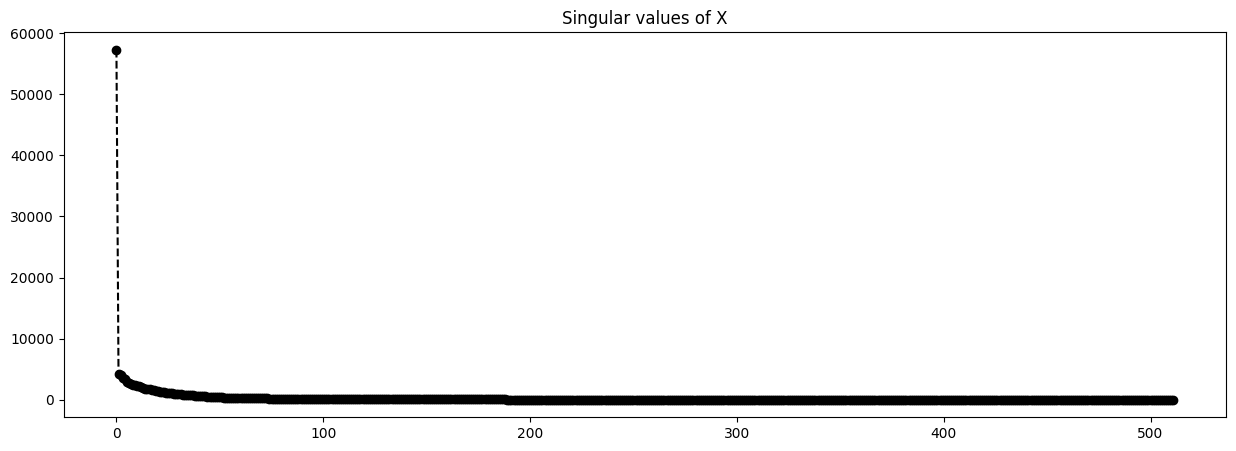

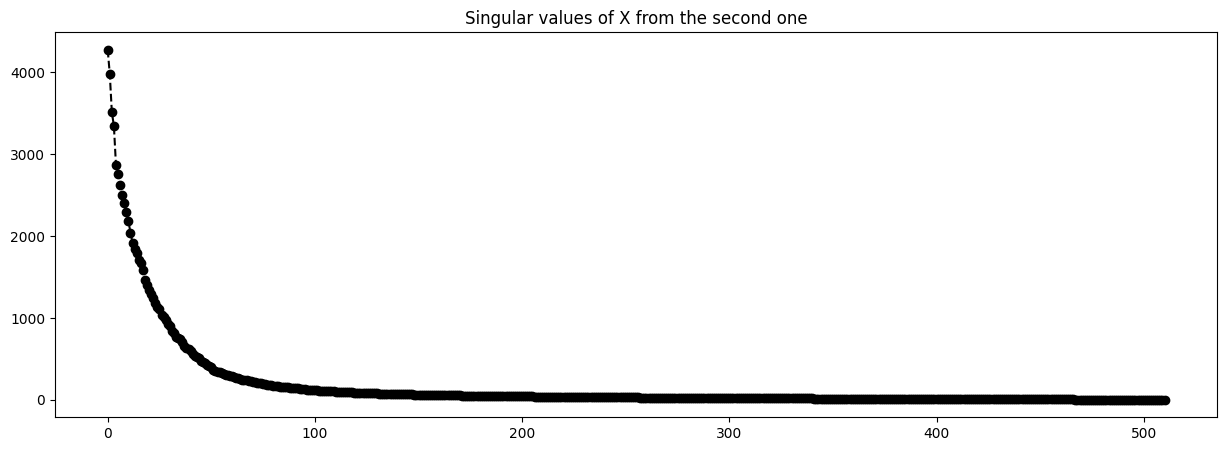

In [4]:
# Plot the singular values of x
plt.figure(figsize=(15,5))
plt.plot(s, 'ko--')
plt.title('Singular values of X')
plt.show()
plt.figure(figsize=(15,5))
plt.plot(s[1:], 'ko--')
plt.title('Singular values of X from the second one')
plt.show()

K = 1
The compression factor c_k : 0.9960899353027344.
||X - X_k||_2 = 4277.049032896637.


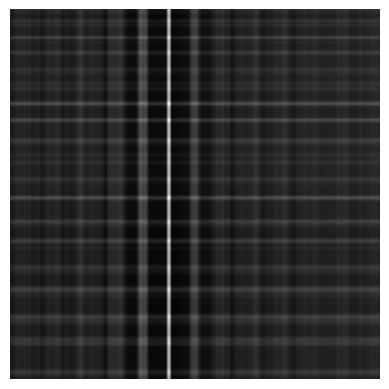

K = 10
The compression factor c_k : 0.9608993530273438.
||X - X_k||_2 = 2294.1109127989635.


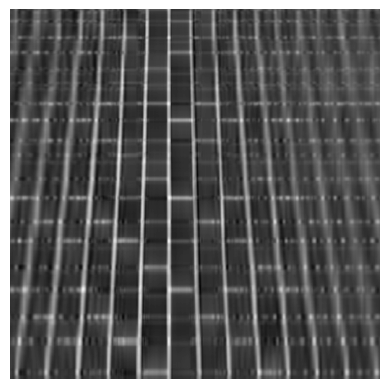

K = 50
The compression factor c_k : 0.8044967651367188.
||X - X_k||_2 = 408.6060427494047.


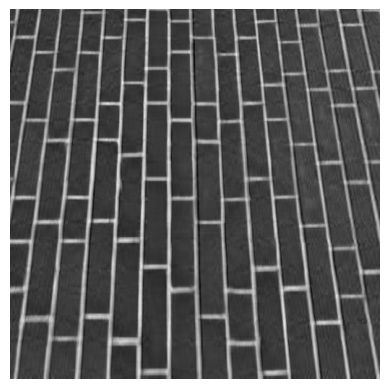

K = 100
The compression factor c_k : 0.6089935302734375.
||X - X_k||_2 = 119.16552972768785.


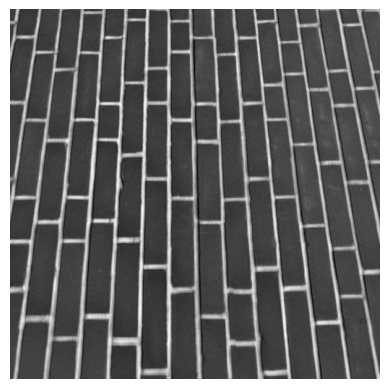

K = 200
The compression factor c_k : 0.217987060546875.
||X - X_k||_2 = 41.87966317285347.


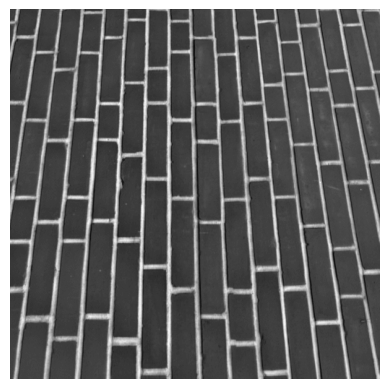

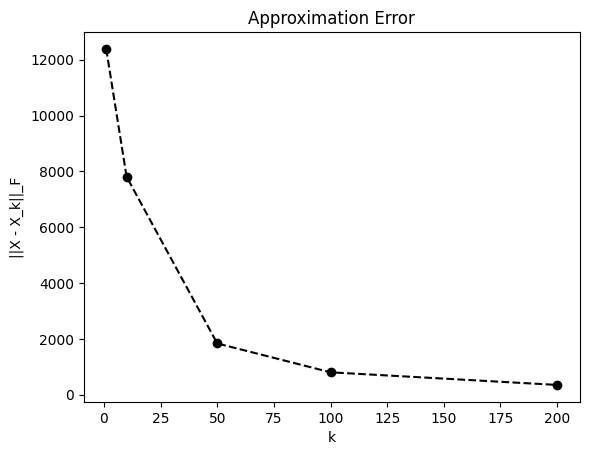

In [5]:
ks = [1, 10, 50, 100, 200]

approx_errors = []

for k in ks:
    S = np.zeros((m, n))
    S[:n, :n] = np.diag(s)
    x_k = U[:, :k] @ S[:k, :k] @VT[:k, :]

    c_k  = 1 - (k * (n + m + 1) / (m * n))
    print('K =', k)
    print('The compression factor c_k : ', c_k, '.', sep='')
    print(f'||X - X_k||_2 = {np.linalg.norm(x - x_k, 2)}.')
    approx_errors.append(np.linalg.norm(x - x_k, 'fro'))
    plt.imshow(x_k, cmap='gray')
    plt.axis('off')
    plt.show()

plt.plot(ks, approx_errors, 'ko--')
plt.xlabel('k')
plt.ylabel('||X - X_k||_F')
plt.title('Approximation Error')
plt.show()

K = 255
||X - X_k||_2 = 28.611361519564728.


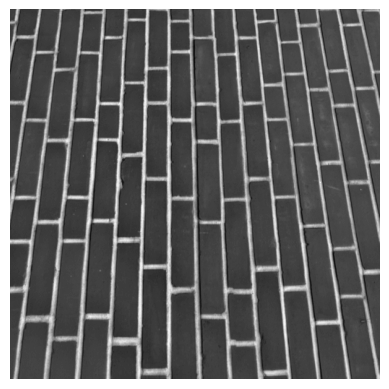

In [6]:
c_k = 0
k = (1 - c_k) * m * n // (m + n + 1)
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)
x_k = U[:, :k] @ S[:k, :k] @VT[:k, :]
print('K =', k)
print(f'||X - X_k||_2 = {np.linalg.norm(x - x_k, 2)}.')
plt.imshow(x_k, cmap='gray')
plt.axis('off')
plt.show()